### Objetivos

  - Conhecer e praticar Aprendizagem por transferência
  - Praticar a classificação de objeto usando framework TensorFlow
  

## Introdução ao Transfer Learning com redes pré-treinadas

Excelente! Agora que já sabemos como utilizar uma rede pré-treinada, vamos explorar uma técnica poderosa chamada Transfer Learning (Aprendizagem por Transferência). Essa abordagem nos permite tirar proveito das arquiteturas de redes neurais existentes e treiná-las para classificar objetos personalizados ou novas categorias de imagens.

O Transfer Learning é uma técnica em que um modelo de aprendizado profundo, treinado previamente em um conjunto de dados maior e mais diversificado, é adaptado para ser aplicado a um novo problema. O conhecimento adquirido pelo modelo original é transferido para o novo problema, permitindo um treinamento mais rápido e, muitas vezes, um desempenho melhor do que treinar uma rede neural do zero.

A ideia por trás do Transfer Learning é que as redes neurais pré-treinadas, como VGG, ResNet e Inception, já aprenderam a ``extrair características`` importantes das imagens em seus primeiros estágios. Essas características podem ser comuns a muitos problemas de classificação de imagens, como detecção de bordas, texturas e padrões. Ao aproveitar esse conhecimento prévio, podemos nos concentrar no treinamento das últimas camadas do modelo, que são responsáveis por aprender características específicas do novo problema.

Ao utilizar o Transfer Learning, podemos economizar tempo e recursos computacionais, além de obter melhores resultados do que treinar uma rede do zero para um conjunto de dados menor e específico. Portanto, é uma técnica amplamente utilizada em aplicações práticas de aprendizado profundo e processamento de imagens.

![](lab_images/tf.png)



## Combinando a rede pré-treinada com um classificador MLP

Ao aplicar o Transfer Learning, nossa rede convolucional será composta por duas partes principais: o extrator de características e o classificador. O extrator de características será baseado em uma rede pré-treinada, como VGG16, ResNet50 ou InceptionV3. Essa parte da rede já aprendeu a extrair características relevantes de imagens, como bordas, texturas e padrões, durante o treinamento em um grande conjunto de dados, como o ImageNet.

Em seguida, adicionaremos um classificador MLP (Multilayer Perceptron) personalizado para resolver o nosso problema específico de classificação de imagens. Esse classificador será responsável por aprender as características específicas do novo conjunto de dados e classificar as imagens nas categorias desejadas.

Dessa forma, a rede ajustada combina o poder das redes pré-treinadas, que já aprenderam a extrair características gerais de imagens, com um classificador personalizado que aprenderá a distinguir as categorias específicas do nosso problema. Como mostra a figura abaixo:

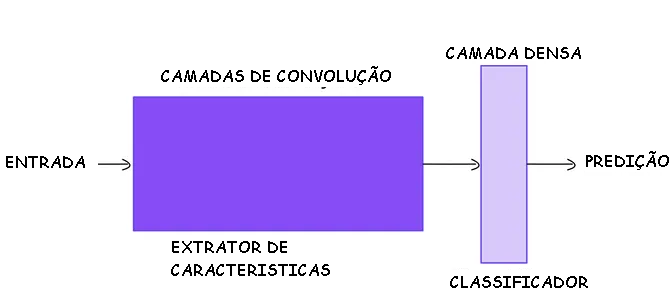

Agora que entendemos os conceitos básicos de Transfer Learning, podemos prosseguir com os passos para aplicar o Transfer Learning e adaptar a rede pré-treinada ao nosso problema de classificação de imagens. 

### Passo a passo para aplicar Transfer Learning

1. Escolha uma rede pré-treinada: Selecione uma rede neural pré-treinada disponível no Keras (por exemplo, VGG16, ResNet50, InceptionV3) com base nas características e requisitos do seu problema. Cada arquitetura tem suas próprias vantagens e desvantagens, portanto, escolha aquela que melhor se adapta às suas necessidades.

2. Remova a camada de classificação: Carregue a rede neural pré-treinada sem a camada de classificação final. Isso pode ser feito usando o argumento include_top=False ao carregar o modelo no Keras. Isso permitirá que você adicione suas próprias camadas personalizadas para classificar as novas categorias.

3. Adicione camadas personalizadas: Adicione camadas específicas para o seu problema de classificação. Normalmente, isso inclui uma camada de GlobalAveragePooling2D, seguida por uma camada densa com uma função de ativação softmax e o número de neuronios igual ao número de classes do novo problema.

4. Congele as camadas pré-treinadas: É uma boa prática congelar as camadas pré-treinadas da rede neural, especialmente durante as primeiras épocas do treinamento. Isso evitará que os pesos dessas camadas sejam atualizados e preservará o conhecimento prévio que elas possuem. No Keras, você pode fazer isso com o modelxxx.trainable = False

5. Pré-processamento dos dados: Prepare os dados de acordo com a rede pré-treinada escolhida. Isso inclui redimensionar as imagens, normalizar os valores dos pixels e codificar as etiquetas das categorias. Lembre-se de aplicar as mesmas transformações usadas no conjunto de dados original da rede pré-treinada.

6. Treine o modelo: Treine o modelo ajustado no seu conjunto de dados. Durante as primeiras épocas, com as camadas pré-treinadas congeladas, o modelo aprenderá as características específicas do novo problema. 

7. Avalie e otimize: Avalie o desempenho do modelo ajustado em um conjunto de teste e otimize os hiperparâmetros conforme necessário. Você pode experimentar diferentes arquiteturas de redes neurais, taxas de aprendizado, otimizadores e outros hiperparâmetros para encontrar a melhor configuração para o seu problema.

## Aplicando transfer learning em um dataset já preparado pelo tensorflow

Vamos usar o dataset `cats_vs_dogs` que é disponibilizado pelo proprio tensorflow, desta forma focamos apenas no entendimento da tecnica de transfer learning e menos em preprocessamento e criação de dados. nas proximas aulas vamos criar nosso proprio dataset...


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuração dos diretórios e parâmetros do conjunto de dados
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

batch_size = 32
image_size = (224, 224)
print(train_dir)


/Users/arnaldoalvesvianajunior/.keras/datasets/cats_and_dogs_filtered/train


Vamos usar o `ImageDataGenerator` é uma classe da biblioteca Keras para carregar grandes conjuntos de imagens organizadas por pastas de classes.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


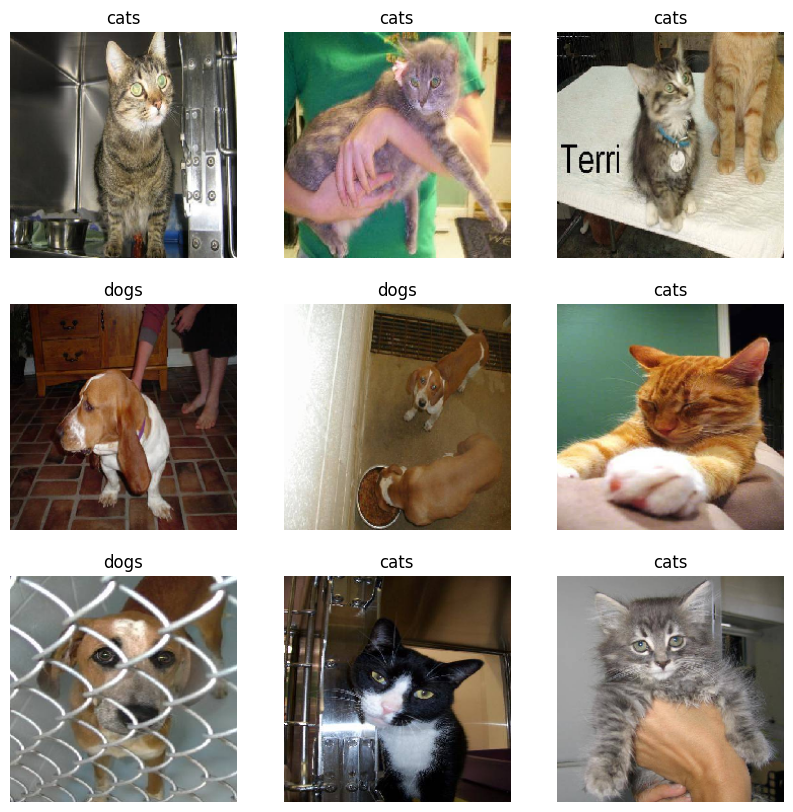

In [18]:
# Função para exibir algumas imagens do conjunto de dados
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i, (img, label) in enumerate(zip(images, labels)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis("off")
    plt.show()

# Carregar imagens e rótulos
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# conjunto de treinamento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Conjunto de validação
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

### imagens carregadas

# Carregar algumas imagens e rótulos do conjunto de dados de treinamento
sample_datagen = ImageDataGenerator(rescale=1./255)
sample_generator = sample_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=9,
    class_mode='binary'
)

sample_images, sample_labels = next(sample_generator)
class_names = {v: k for k, v in sample_generator.class_indices.items()}
plot_images(sample_images, sample_labels, class_names)

### Escolhendo um modelo pré-treinado

A `MobileNet V2` desenvolvido no Google e foi treinado com `1,4 milhão de imagens` e possui `1000 classes diferentes` com pesos predeterminados do imagenet (Googles dataset).

Carregue a rede neural pré-treinada sem a camada de classificação final. Isso pode ser feito usando o argumento ``include_top=False``


In [19]:
# Cria o base_model referente a MobileNet V2, sem a camada de classificação
base_model = MobileNetV2(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

In [20]:
print("Arquitetura do Modelo:")
print(f"- Número total de camadas: {len(base_model.layers)}")
print(f"- Input shape: {base_model.input_shape}")
print(f"- Output shape: {base_model.output_shape}")


# Visualizar camadas convolucionais disponíveis
conv_layers = [layer.name for layer in base_model.layers if 'conv' in layer.name]
print(f"\nCamadas Convolucionais ({len(conv_layers)}):")

for i, layer in enumerate(conv_layers):
    print(f"  {i+1:2d}. {layer}")

Arquitetura do Modelo:
- Número total de camadas: 154
- Input shape: (None, 224, 224, 3)
- Output shape: (None, 7, 7, 1280)

Camadas Convolucionais (5):
   1. expanded_conv_depthwise
   2. expanded_conv_depthwise_BN
   3. expanded_conv_depthwise_relu
   4. expanded_conv_project
   5. expanded_conv_project_BN


In [21]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [22]:
#Congela a base_model para não atuaizar os pesos quando treinar.

base_model.trainable = False

In [23]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

### Adicionando um Classificador

In [24]:
#Camada  para gerar um vetor de 1280 elementos 
global_average_layer = layers.GlobalAveragePooling2D()

# O Classificador para gato cachorro com 1 neuronio 
saida_layer = layers.Dense(1, activation='sigmoid')

In [25]:
model = tf.keras.Sequential([
  base_model,   #### cnn mobilenetv2
  global_average_layer, ###flatten
  saida_layer ### especialista
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Pronto! Já criamos a nossa rede para classificação. Agora podemos treinar nossa rede e testar.

## Desafio 2 

Vamos entender o que acabamos de fazer. Avalie a quantidade de parametros total, treinaveis e não treinaveis. O que foi identificado?



#### sua resposta aqui.....


.

### Treinamento do modelo

In [26]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
#Avaliação do modelo antes de treiná-lo com novas imagens
validation_steps=20

# Avaliação do modelo antes de treiná-lo com novas imagens
print("Avaliação do modelo antes de treiná-lo com novas imagens")
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print(f"Loss: {loss0}, Accuracy: {accuracy0}")

Avaliação do modelo antes de treiná-lo com novas imagens


/Users/arnaldoalvesvianajunior/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.5934 - loss: 0.7127
Loss: 0.7260102033615112, Accuracy: 0.574999988079071


In [ ]:
# Treinamento da nova CNN
history = model.fit(train_generator, epochs=5, validation_data=validation_generator,callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
])


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - accuracy: 0.8466 - loss: 0.3620 - val_accuracy: 0.9780 - val_loss: 0.0837
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.9786 - loss: 0.0797 - val_accuracy: 0.9820 - val_loss: 0.0632
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9852 - loss: 0.0529 - val_accuracy: 0.9820 - val_loss: 0.0552
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.9880 - loss: 0.0429 - val_accuracy: 0.9800 - val_loss: 0.0511
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - accuracy: 0.9936 - loss: 0.0356 - val_accuracy: 0.9810 - val_loss: 0.0475


In [29]:
# Avaliação do modelo após o treinamento
print("Avaliação do modelo após o treinamento") 
loss_tl, accuracy_tl = model.evaluate(validation_generator, steps=validation_steps)
print(f"Loss: {loss_tl}, Accuracy: {accuracy_tl}")

Avaliação do modelo após o treinamento
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.9771 - loss: 0.0578
Loss: 0.05082212761044502, Accuracy: 0.979687511920929


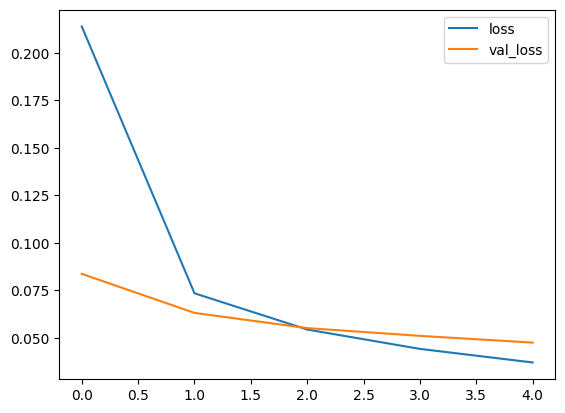

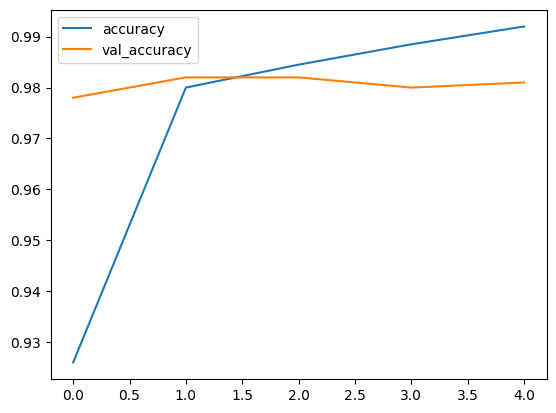

In [30]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy", "val_accuracy"]].plot();

### Fazendo predições

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_cat_or_dog(img_path, model):
    
    modelo = model
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = modelo.predict(img_array)
    
    if prediction[0][0] < 0.5:
        return "gatinhooooo"
    else:
        return "cachorrinho"

# Teste a função de previsão com uma imagem

# !wget https://uploads.metropoles.com/wp-content/uploads/2022/07/21154234/como-identificar-que-um-cachorro-esta-sendo-vitima-de-maus-tratos-1.jpg -O /content/cachorro.jpg
# img_path = "cachorro.jpg"
img_path = "lab_images/dogcat.png"

result = predict_cat_or_dog(img_path,model)
print("Essa foto é de um ", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Essa foto é de um  cachorrinho


### Salvando o modelo da rede treinada 

Agora que já temos um modelo treinado e ajustado para resolver o problema especifico que temos, podemos salver a arquitetura e os pesos em um arquivo com extensão .h5

para usar esta rede, basta carregar o arquivo.h5


In [ ]:
# # Salvando a rede 
# model.save("dogs_vs_cats.h5")

# #Carregando uma rede .h5
# new_model = models.load_model('dogs_vs_cats.h5')

podemos salvar em forma .keras tambem. trata-se de um formato mais atual e robusto mas não é compativel com algumas ferramentas antigas.

In [ ]:
# # from tensorflow.keras.models import load_model
# image_size = (224, 224)
# # Salvando a rede 
# # model.save("dogs_vs_cats.keras")

# #Carregando uma rede .keras
# new_model = load_model('dogs_vs_cats.keras')

# # Teste a função de previsão com uma imagem
# img_path = "dog.png"
# result = predict_cat_or_dog(img_path,new_model)
# print("Essa foto é de um ", result)


## Desafio 3

Aplicar o Transfer Learning usando a rede pré-treinada ResNet50 e o conjunto de dados CIFAR-10, que possui 10 classes de objetos.

In [ ]:
### Seu código aqui....







## Fine-tuning do modelo pré-treinado

Após o treinamento inicial, podemos descongelar algumas camadas superiores do modelo base para fazer um "fine-tuning" e melhorar ainda mais o desempenho.

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 388ms/step - accuracy: 0.9696 - loss: 0.1307 - val_accuracy: 0.9820 - val_loss: 0.3531
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.9922 - loss: 0.0220 - val_accuracy: 0.9740 - val_loss: 0.4549
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.9946 - loss: 0.0158 - val_accuracy: 0.9820 - val_loss: 0.2709
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.9934 - loss: 0.0134 - val_accuracy: 0.9750 - val_loss: 0.3901
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 390ms/step - accuracy: 0.9978 - loss: 0.0084 - val_accuracy: 0.9770 - val_loss: 0.4282


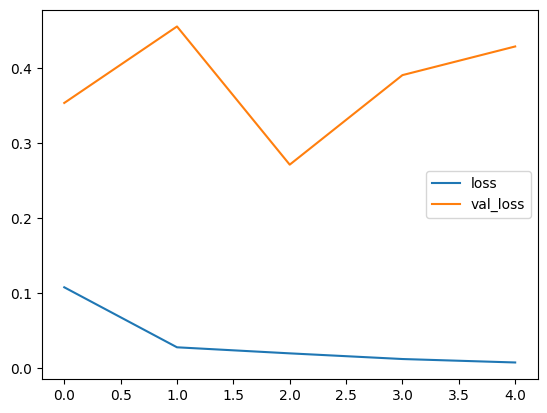

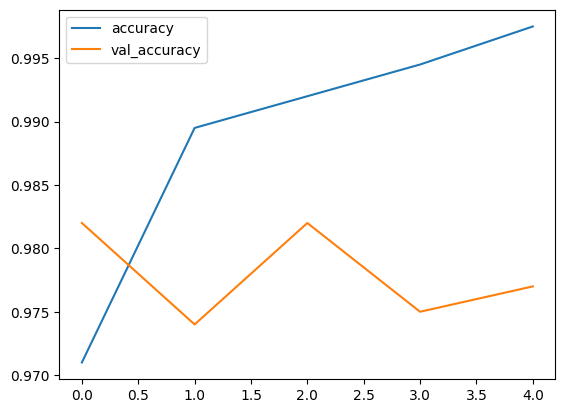

In [34]:
# Descongelar camadas para fine-tuning
# Vamos manter as primeiras camadas congeladas e treinar as últimas camadas
base_model.trainable = True

# Congelar todas as camadas exceto as últimas 20
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompilar o modelo com uma taxa de aprendizado menor para fine-tuning
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar com fine-tuning
# Treinamento da nova CNN

history_ft = model.fit(train_generator, epochs=5, validation_data=validation_generator)


# Visualizar os resultados do fine-tuning
metrics_df = pd.DataFrame(history_ft.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy", "val_accuracy"]].plot();

In [ ]:
# Avaliar o modelo com transfer learning fine tuning
loss_ft, accuracy_ft = model.evaluate(validation_generator, steps=validation_steps)
print(f"Loss: {loss_ft}, Accuracy: {accuracy_ft}")

# Comparar com os modelos treinados
print(f"\nComparando os modelos:")
print(f"Transfer Learning: Loss: {loss0}, Accuracy: {accuracy0}")
print(f"Transfer Learning Fine Tuning: Loss: {loss_ft}, Accuracy: {accuracy_ft}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 578ms/step - accuracy: 0.9709 - loss: 0.9036
Loss: 0.9954007267951965, Accuracy: 0.965624988079071

Comparando os modelos:
Transfer Learning: Loss: 0.8389073610305786, Accuracy: 0.38593751192092896
Transfer Learning Fine Tuning: Loss: 0.9954007267951965, Accuracy: 0.965624988079071
